# Asset Correlation 

*We chose to use Amazon, Boeing, Microsfot, Bitcoin, Gold & 30-year Treasury Bonds data to comapare with the Sattle Median housing price data to see if there is any correlation

### Import libraries and dependencies

In [ ]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
import seaborn as sns
import json

import warnings
warnings.filterwarnings('ignore')

In [37]:
import hvplot.pandas

In [38]:
load_dotenv("../Resources/jfk.env")
MAPBOX_API_KEY = os.getenv("MAPBOX_API_KEY")

In [4]:
file_path = Path("../Resources/Asset_Prices_Month.csv") 
asset_data = pd.read_csv(file_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
asset_data.head()

,AMZN,BA,MSFT,BTC,Gold,30 T-Bond
Date,,,,,,
2012-02-29,179.69,74.95,31.74,NaN,1716.6,3.08
2012-03-31,202.51,74.37,32.26,NaN,1674.3,3.35
2012-04-30,231.90,76.80,32.02,NaN,1666.5,3.12
2012-05-31,212.91,69.61,29.19,NaN,1564.2,2.67
2012-06-30,228.35,74.30,30.59,NaN,1604.2,2.76


In [5]:
asset_data.dtypes

AMZN         float64
BA           float64
MSFT         float64
BTC          float64
Gold         float64
30 T-Bond    float64
dtype: object

In [6]:
asset_returns = asset_data.pct_change()
asset_returns.head()

,AMZN,BA,MSFT,BTC,Gold,30 T-Bond
Date,,,,,,
2012-02-29,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-31,0.126996,-0.007738,0.016383,NaN,-0.024642,0.087662
2012-04-30,0.145129,0.032674,-0.007440,NaN,-0.004659,-0.068657
2012-05-31,-0.081889,-0.093620,-0.088382,NaN,-0.061386,-0.144231
2012-06-30,0.072519,0.067375,0.047962,NaN,0.025572,0.033708


In [7]:
file_path = Path("../Resources/housing_prices_month_aggregate_clean.csv") 
housing_data = pd.read_csv(file_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
housing_data.head()

,Median Sale Price
Date,
2012-02-29,309511.1111
2012-03-31,313230.5556
2012-04-30,325841.1111
2012-05-31,335194.4444
2012-06-30,331952.2222


In [8]:
housing_data.dtypes

Median Sale Price    float64
dtype: object

In [9]:
all_assets = pd.concat([asset_data, housing_data], axis="columns", join="inner")
all_assets.head()

,AMZN,BA,MSFT,BTC,Gold,30 T-Bond,Median Sale Price
Date,,,,,,,
2012-02-29,179.69,74.95,31.74,NaN,1716.6,3.08,309511.1111
2012-03-31,202.51,74.37,32.26,NaN,1674.3,3.35,313230.5556
2012-04-30,231.90,76.80,32.02,NaN,1666.5,3.12,325841.1111
2012-05-31,212.91,69.61,29.19,NaN,1564.2,2.67,335194.4444
2012-06-30,228.35,74.30,30.59,NaN,1604.2,2.76,331952.2222


In [10]:
housing_returns = housing_data.pct_change()
housing_returns.head()

,Median Sale Price
Date,
2012-02-29,NaN
2012-03-31,0.012017
2012-04-30,0.040260
2012-05-31,0.028705
2012-06-30,-0.009673


In [11]:
all_returns = pd.concat([asset_returns, housing_returns], axis="columns", join="inner")
all_returns.head()


,AMZN,BA,MSFT,BTC,Gold,30 T-Bond,Median Sale Price
Date,,,,,,,
2012-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-31,0.126996,-0.007738,0.016383,NaN,-0.024642,0.087662,0.012017
2012-04-30,0.145129,0.032674,-0.007440,NaN,-0.004659,-0.068657,0.040260
2012-05-31,-0.081889,-0.093620,-0.088382,NaN,-0.061386,-0.144231,0.028705
2012-06-30,0.072519,0.067375,0.047962,NaN,0.025572,0.033708,-0.009673


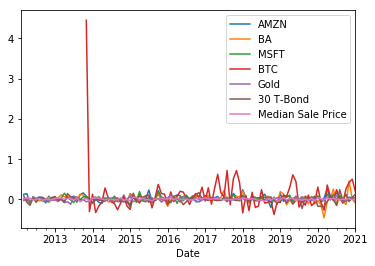

In [12]:
all_returns.plot()

In [13]:
correlation = all_returns.corr()
correlation

,AMZN,BA,MSFT,BTC,Gold,30 T-Bond,Median Sale Price
AMZN,1.000000,0.282400,0.470951,0.131068,0.059120,0.056182,-0.013569
BA,0.282400,1.000000,0.273241,0.085469,-0.104781,0.217059,0.130730
MSFT,0.470951,0.273241,1.000000,0.171341,-0.138826,0.239857,0.128542
BTC,0.131068,0.085469,0.171341,1.000000,-0.098619,0.055994,0.137178
Gold,0.059120,-0.104781,-0.138826,-0.098619,1.000000,-0.305347,-0.086139
30 T-Bond,0.056182,0.217059,0.239857,0.055994,-0.305347,1.000000,0.080675
Median Sale Price,-0.013569,0.130730,0.128542,0.137178,-0.086139,0.080675,1.000000


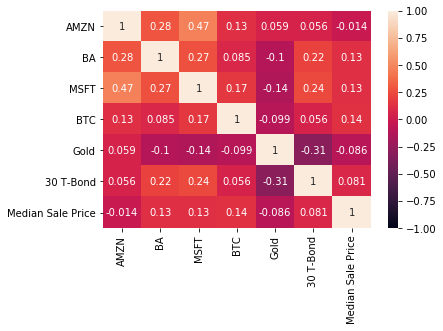

In [14]:
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

In [15]:
correlation_2 = all_assets.corr()
correlation_2

,AMZN,BA,MSFT,BTC,Gold,30 T-Bond,Median Sale Price
AMZN,1.000000,0.590124,0.982338,0.830743,0.482097,-0.699015,0.918371
BA,0.590124,1.000000,0.542075,0.411225,-0.137401,-0.116423,0.744053
MSFT,0.982338,0.542075,1.000000,0.833201,0.522869,-0.751674,0.889495
BTC,0.830743,0.411225,0.833201,1.000000,0.740757,-0.545785,0.772336
Gold,0.482097,-0.137401,0.522869,0.740757,1.000000,-0.607293,0.196240
30 T-Bond,-0.699015,-0.116423,-0.751674,-0.545785,-0.607293,1.000000,-0.599747
Median Sale Price,0.918371,0.744053,0.889495,0.772336,0.196240,-0.599747,1.000000


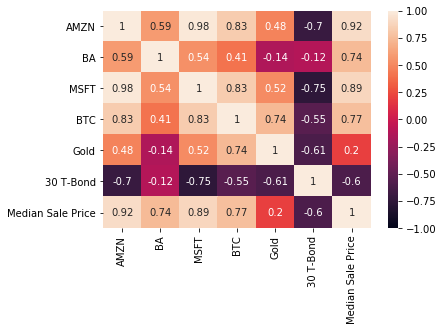

In [16]:
sns.heatmap(correlation_2, vmin=-1, vmax=1, annot=True)

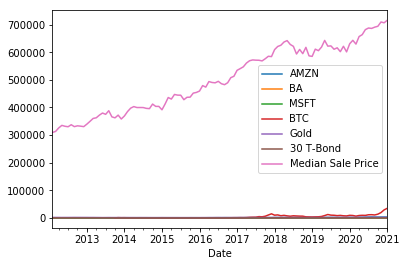

In [17]:
all_assets.plot()

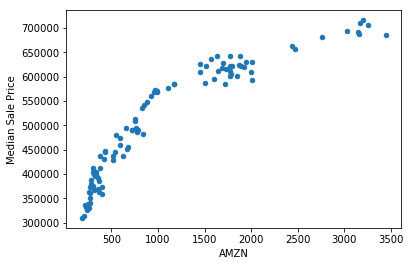

In [18]:
all_assets.plot(kind='scatter', x='AMZN', y='Median Sale Price')

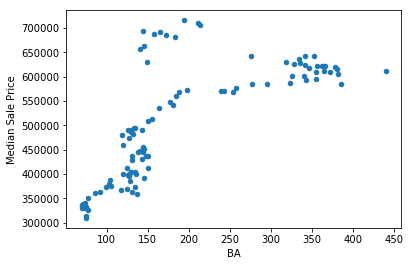

In [19]:
all_assets.plot(kind='scatter', x='BA', y='Median Sale Price')

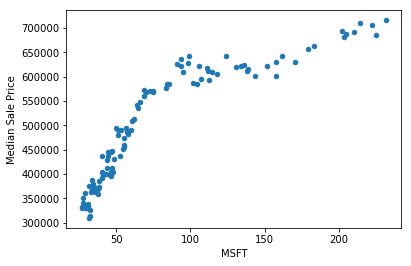

In [20]:
all_assets.plot(kind='scatter', x='MSFT', y='Median Sale Price')

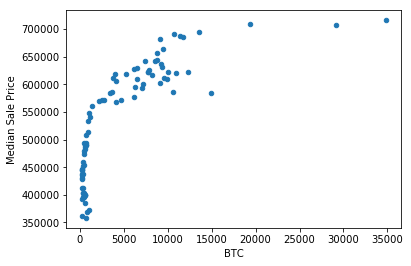

In [21]:
all_assets.plot(kind='scatter', x='BTC', y='Median Sale Price')

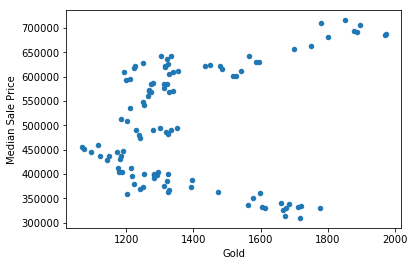

In [22]:
all_assets.plot(kind='scatter', x='Gold', y='Median Sale Price')

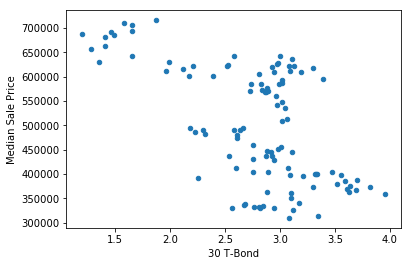

In [23]:
all_assets.plot(kind='scatter', x='30 T-Bond', y='Median Sale Price')

In [24]:
asset_data_refined = asset_data.drop(columns=["Gold", "BA", "30 T-Bond"])
asset_data_refined.head()

,AMZN,MSFT,BTC
Date,,,
2012-02-29,179.69,31.74,NaN
2012-03-31,202.51,32.26,NaN
2012-04-30,231.90,32.02,NaN
2012-05-31,212.91,29.19,NaN
2012-06-30,228.35,30.59,NaN


In [25]:
weights = [1/3, 1/3, 1/3]
asset_index = asset_data_refined.dot(weights)
asset_index.tail()

Date
2020-12-31    10863.623333
2021-01-31    12760.240000
2021-02-28    16359.140000
2021-03-31    20749.560000
2021-04-30    20833.053333
dtype: float64

In [26]:
asset_index_combine = pd.concat([asset_index, housing_data], axis="columns", join="inner")
asset_index_combine.head()

,0,Median Sale Price
Date,,
2012-02-29,NaN,309511.1111
2012-03-31,NaN,313230.5556
2012-04-30,NaN,325841.1111
2012-05-31,NaN,335194.4444
2012-06-30,NaN,331952.2222


In [27]:
correlation_3 = asset_index_combine.corr()
correlation_3

,0,Median Sale Price
0,1.000000,0.806781
Median Sale Price,0.806781,1.000000


In [28]:
asset_data_refined_1 = asset_data.drop(columns=["MSFT", "BTC", "Gold", "BA", "30 T-Bond"])
asset_data_refined_1.head()

,AMZN
Date,
2012-02-29,179.69
2012-03-31,202.51
2012-04-30,231.90
2012-05-31,212.91
2012-06-30,228.35


In [29]:
amzn_housing_data = pd.concat([asset_data_refined_1, housing_data], axis="columns", join="inner")
amzn_housing_data.head()

,AMZN,Median Sale Price
Date,,
2012-02-29,179.69,309511.1111
2012-03-31,202.51,313230.5556
2012-04-30,231.90,325841.1111
2012-05-31,212.91,335194.4444
2012-06-30,228.35,331952.2222


In [30]:
file_path = Path("../Resources/housing_prices_month_clean_transposed.csv") 
housing_price_mnth_df = pd.read_csv(file_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
housing_price_mnth_df.head()

,Auburn,Bainbridge Island,Bellevue,Bothell,Brier,Burien,Des Moines,DuPont,Edmonds,Everett,...,Seattle - Magnolia,Seattle - Queen Anne,Seattle - South Lake Union,Seattle - Wallingford,Seattle - West Seattle,Shoreline,Snoqualmie,Tacoma,Tukwila,Woodinville
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-31,188000,407000,370000,314000,540000,181000,185000,285000,320000,181000,...,441250.0,458750.0,329000.0,472000.0,285000.0,247000,377000,141000,122000,353000
2012-02-29,206000,483000,418000,325000,500000,194000,151000,261000,320000,187000,...,469000.0,461000.0,329000.0,488000.0,290000.0,235000,439000,140000,148000,433000
2012-03-31,197000,500000,445000,315000,275000,211000,168000,267000,300000,200000,...,473900.0,463000.0,318500.0,490000.0,320000.0,246000,412000,145000,163000,427000
2012-04-30,209000,527000,460000,325000,500000,194000,175000,260000,325000,190000,...,485600.0,477000.0,325000.0,545000.0,311000.0,252000,443000,155000,120000,410000
2012-05-31,225000,453000,485000,318000,310000,220000,189000,270000,358000,185000,...,494000.0,455000.0,318000.0,558000.0,326000.0,297000,448000,160000,69000,498000


In [31]:
housing_town_data_combine = pd.concat([asset_data_refined_1, housing_price_mnth_df], axis="columns", join="inner")
housing_town_data_combine.head()

,AMZN,Auburn,Bainbridge Island,Bellevue,Bothell,Brier,Burien,Des Moines,DuPont,Edmonds,...,Seattle - Magnolia,Seattle - Queen Anne,Seattle - South Lake Union,Seattle - Wallingford,Seattle - West Seattle,Shoreline,Snoqualmie,Tacoma,Tukwila,Woodinville
Date,,,,,,,,,,,,,,,,,,,,,
2012-02-29,179.69,206000,483000,418000,325000,500000,194000,151000,261000,320000,...,469000.0,461000.0,329000.0,488000.0,290000.0,235000,439000,140000,148000,433000
2012-03-31,202.51,197000,500000,445000,315000,275000,211000,168000,267000,300000,...,473900.0,463000.0,318500.0,490000.0,320000.0,246000,412000,145000,163000,427000
2012-04-30,231.90,209000,527000,460000,325000,500000,194000,175000,260000,325000,...,485600.0,477000.0,325000.0,545000.0,311000.0,252000,443000,155000,120000,410000
2012-05-31,212.91,225000,453000,485000,318000,310000,220000,189000,270000,358000,...,494000.0,455000.0,318000.0,558000.0,326000.0,297000,448000,160000,69000,498000
2012-06-30,228.35,220000,535000,493000,320000,310000,235000,163000,280000,311000,...,515000.0,439000.0,416000.0,558000.0,328400.0,294000,423000,155000,173000,430000


In [32]:
correlation_3 = housing_town_data_combine.corr()
correlation_3

,AMZN,Auburn,Bainbridge Island,Bellevue,Bothell,Brier,Burien,Des Moines,DuPont,Edmonds,...,Seattle - Magnolia,Seattle - Queen Anne,Seattle - South Lake Union,Seattle - Wallingford,Seattle - West Seattle,Shoreline,Snoqualmie,Tacoma,Tukwila,Woodinville
AMZN,1.000000,0.936234,0.830674,0.883721,0.882584,0.771126,0.893930,0.892929,0.874634,0.913301,...,0.884642,0.865498,0.703919,0.831057,0.873208,0.884808,0.870652,0.958468,0.861851,0.903772
Auburn,0.936234,1.000000,0.871557,0.950752,0.955844,0.819515,0.959408,0.957699,0.826883,0.956544,...,0.940696,0.924746,0.782210,0.911455,0.952445,0.957197,0.919320,0.984242,0.929027,0.947542
Bainbridge Island,0.830674,0.871557,1.000000,0.881926,0.871270,0.754155,0.888808,0.861616,0.725204,0.892147,...,0.887243,0.874989,0.710635,0.893762,0.901391,0.889480,0.857055,0.881947,0.830992,0.862092
Bellevue,0.883721,0.950752,0.881926,1.000000,0.949826,0.796785,0.949639,0.930516,0.764310,0.940289,...,0.924004,0.935843,0.801123,0.932672,0.956306,0.957909,0.927689,0.945313,0.896770,0.930959
Bothell,0.882584,0.955844,0.871270,0.949826,1.000000,0.831517,0.953336,0.958820,0.747147,0.952384,...,0.960998,0.944114,0.827795,0.950723,0.975095,0.977288,0.932351,0.950351,0.916794,0.944726
Brier,0.771126,0.819515,0.754155,0.796785,0.831517,1.000000,0.800095,0.795722,0.681659,0.800724,...,0.816246,0.771488,0.690459,0.801187,0.815675,0.818898,0.787176,0.817264,0.752865,0.806516
Burien,0.893930,0.959408,0.888808,0.949639,0.953336,0.800095,1.000000,0.949000,0.801416,0.949634,...,0.959092,0.938614,0.801306,0.938888,0.971583,0.966963,0.917975,0.961624,0.923047,0.945555
Des Moines,0.892929,0.957699,0.861616,0.930516,0.958820,0.795722,0.949000,1.000000,0.760903,0.950340,...,0.947134,0.927932,0.783223,0.928430,0.955655,0.956308,0.908980,0.959841,0.907548,0.936197
DuPont,0.874634,0.826883,0.725204,0.764310,0.747147,0.681659,0.801416,0.760903,1.000000,0.819930,...,0.780439,0.747236,0.621730,0.702063,0.766939,0.774552,0.744899,0.859125,0.765253,0.779693
Edmonds,0.913301,0.956544,0.892147,0.940289,0.952384,0.800724,0.949634,0.950340,0.819930,1.000000,...,0.944915,0.928581,0.817467,0.915570,0.956422,0.957711,0.930404,0.962070,0.898445,0.944361


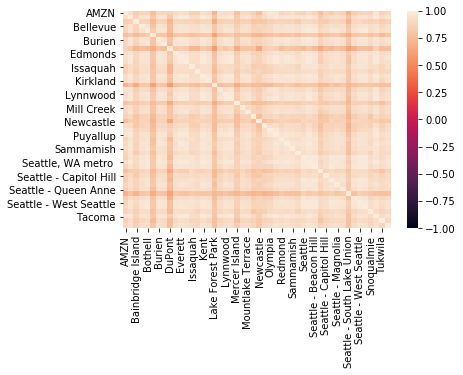

In [33]:
sns.heatmap(correlation_3, vmin=-1, vmax=1)